In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from data_preprocess import get_training_dataset, \
              get_validation_dataset, dataset_to_numpy
from vizualisation import display_digits_with_boxes

In [3]:
from data_preprocess import get_training_dataset, \
              get_validation_dataset, dataset_to_numpy
from model_creation_without_transfer_learning import feature_extractor, dense_layers, classification_layer, building_box_regression, final_model, define_compile_model




In [4]:
train_dataset, val_dataset = get_training_dataset(), get_validation_dataset()

In [5]:
(train_data, train_labels, train_boxes, valid_data, valid_labels, valid_boxes) = dataset_to_numpy(train_dataset, val_dataset, 10)

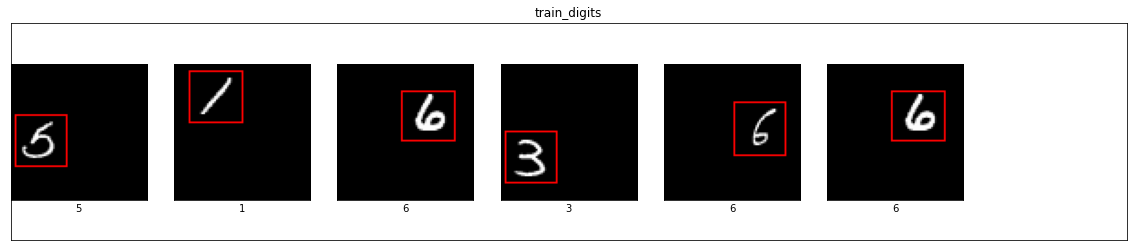

In [6]:
display_digits_with_boxes(train_data, train_labels, train_labels, np.array([]), train_boxes, np.array([]),'train_digits', 7)

In [7]:
                                              
print('hei you are done')
                        

hei you are done


In [8]:
j=1
for i in val_dataset:
    print(j)
    j+=1

1


In [9]:
938*64

60032

In [10]:
60032//64

938

In [11]:
60000//64

937

In [12]:
inputs = tf.keras.layers.Input(shape=(75, 75, 1,))
model = define_compile_model(inputs)
# print(model.summary()
epochs = 3


In [13]:
epochs = 3
batch_size = bs = 64
history = model.fit(train_dataset, steps_per_epoch=60_032//bs, validation_data=val_dataset, validation_steps=1, epochs=epochs)

Epoch 1/3
938/938 [==============================] - 13s 14ms/step - loss: 1.0152 - classifier_loss: 0.9983 - bounding_box_loss: 0.0169 - classifier_accuracy: 0.6496 - bounding_box_mse: 0.0169 - val_loss: 0.3030 - val_classifier_loss: 0.2919 - val_bounding_box_loss: 0.0111 - val_classifier_accuracy: 0.9097 - val_bounding_box_mse: 0.0111
Epoch 2/3
938/938 [==============================] - 12s 13ms/step - loss: 0.2655 - classifier_loss: 0.2588 - bounding_box_loss: 0.0068 - classifier_accuracy: 0.9222 - bounding_box_mse: 0.0068 - val_loss: 0.3096 - val_classifier_loss: 0.3035 - val_bounding_box_loss: 0.0061 - val_classifier_accuracy: 0.8974 - val_bounding_box_mse: 0.0061
Epoch 3/3
938/938 [==============================] - 12s 13ms/step - loss: 0.1884 - classifier_loss: 0.1846 - bounding_box_loss: 0.0038 - classifier_accuracy: 0.9442 - bounding_box_mse: 0.0038 - val_loss: 0.2007 - val_classifier_loss: 0.1973 - val_bounding_box_loss: 0.0035 - val_classifier_accuracy: 0.9374 - val_bounding

In [14]:
loss, classificaion_loss, bounding_box_loss, classificaion_accuracy,\
bounding_box_mse = model.evaluate(val_dataset, steps = 1)

print(f'validation accuracy: {classificaion_accuracy}')

1/1 [==============================] - 0s 1ms/step - loss: 0.1947 - classifier_loss: 0.1912 - bounding_box_loss: 0.0035 - classifier_accuracy: 0.9388 - bounding_box_mse: 0.0035
validation accuracy: 0.9387999773025513


In [15]:
from vizualisation import plt_metrics

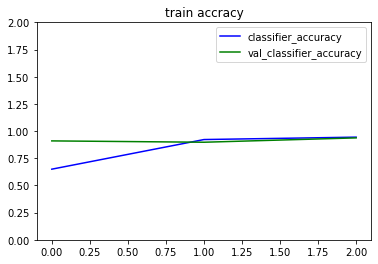

In [16]:
plt_metrics('classifier_accuracy','train accracy', history)

In [17]:
predictions = model.predict(valid_data, batch_size=64)

In [18]:
predictions

[array([[3.96678806e-05, 3.98058000e-06, 3.38702848e-05, ...,
         6.54884567e-13, 1.09143235e-04, 2.52989700e-08],
        [1.30410620e-03, 5.15524589e-05, 8.75344455e-01, ...,
         1.22334444e-04, 8.54313932e-03, 1.83601791e-04],
        [5.10996662e-11, 3.16168531e-08, 3.75767877e-06, ...,
         1.66628908e-07, 7.72503938e-07, 4.34525766e-08],
        ...,
        [1.28084254e-02, 4.40132801e-08, 9.81423199e-01, ...,
         2.67416654e-05, 1.46600662e-03, 5.40045614e-04],
        [2.41740257e-04, 1.03274139e-07, 9.30872484e-05, ...,
         2.27463343e-11, 5.38241118e-04, 1.29560974e-07],
        [8.15963745e-02, 9.17660415e-01, 2.61322220e-05, ...,
         1.31250097e-04, 4.87192337e-05, 4.84492994e-05]], dtype=float32),
 array([[0.4825233 , 0.32346982, 0.84078455, 0.6994118 ],
        [0.15529045, 0.13192081, 0.5331534 , 0.46479142],
        [0.54852307, 0.34178212, 0.89124227, 0.61477166],
        ...,
        [0.7531239 , 0.49245846, 1.1134349 , 0.91775733],
     

In [19]:
predicted_labels = np.argmax(predictions[0], axis=1)

In [20]:
pred_boxes = predictions[1]
pred_boxes

array([[0.4825233 , 0.32346982, 0.84078455, 0.6994118 ],
       [0.15529045, 0.13192081, 0.5331534 , 0.46479142],
       [0.54852307, 0.34178212, 0.89124227, 0.61477166],
       ...,
       [0.7531239 , 0.49245846, 1.1134349 , 0.91775733],
       [0.26330292, 0.6886959 , 0.57830775, 0.9943455 ],
       [0.15999793, 0.00938424, 0.63507855, 0.44619542]], dtype=float32)

In [21]:
valid_boxes

array([[0.49333334, 0.33333334, 0.8666667 , 0.70666665],
       [0.10666667, 0.09333333, 0.48      , 0.46666667],
       [0.49333334, 0.25333333, 0.8666667 , 0.62666667],
       ...,
       [0.6       , 0.46666667, 0.97333336, 0.84      ],
       [0.22666667, 0.61333334, 0.6       , 0.9866667 ],
       [0.18666667, 0.        , 0.56      , 0.37333333]], dtype=float32)

In [22]:
np.split(pred_boxes, 4, axis=1)

[array([[0.4825233 ],
        [0.15529045],
        [0.54852307],
        ...,
        [0.7531239 ],
        [0.26330292],
        [0.15999793]], dtype=float32),
 array([[0.32346982],
        [0.13192081],
        [0.34178212],
        ...,
        [0.49245846],
        [0.6886959 ],
        [0.00938424]], dtype=float32),
 array([[0.84078455],
        [0.5331534 ],
        [0.89124227],
        ...,
        [1.1134349 ],
        [0.57830775],
        [0.63507855]], dtype=float32),
 array([[0.6994118 ],
        [0.46479142],
        [0.61477166],
        ...,
        [0.91775733],
        [0.9943455 ],
        [0.44619542]], dtype=float32)]

In [23]:
from vizualisation import intersection_over_union

In [24]:
from vizualisation import plt_metrics

In [25]:
predicted_labels = np.argmax(predictions[0], axis=1)

In [26]:
predicted_bboxes = predictions[1]

In [27]:
iou = intersection_over_union(predicted_bboxes, valid_boxes)

In [28]:
iou

array([[0.8660409 ],
       [0.68813646],
       [0.59450924],
       ...,
       [0.35417396],
       [0.6619497 ],
       [0.6438811 ]], dtype=float32)

In [29]:
iou_threshold = 0.6

In [30]:

print("Number of predictions where iou > threshold(%s): %s" % (iou_threshold, (iou >= iou_threshold).sum()))
print("Number of predictions where iou < threshold(%s): %s" % (iou_threshold, (iou < iou_threshold).sum()))

Number of predictions where iou > threshold(0.6): 6452
Number of predictions where iou < threshold(0.6): 3548


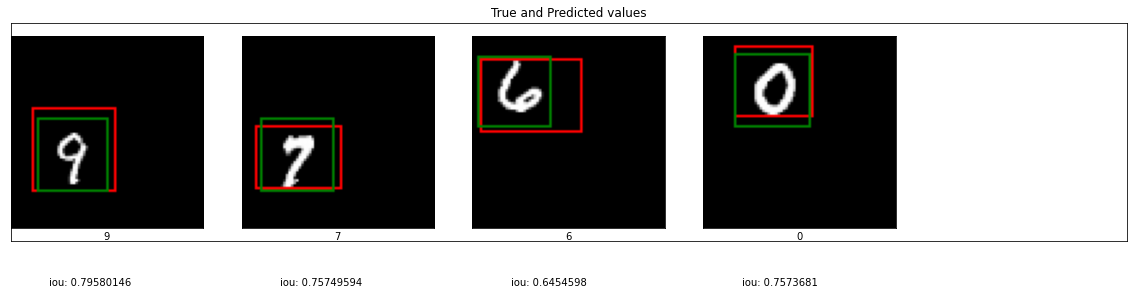

In [34]:
display_digits_with_boxes(valid_data,  predicted_labels, valid_labels,  predicted_bboxes, valid_boxes, iou, "True and Predicted values",5)

In [31]:
np.random.choice(len(predicted_labels), size=4)

array([4843, 8912, 3535, 7599])

In [32]:

predictions

[array([[3.96678806e-05, 3.98058000e-06, 3.38702848e-05, ...,
         6.54884567e-13, 1.09143235e-04, 2.52989700e-08],
        [1.30410620e-03, 5.15524589e-05, 8.75344455e-01, ...,
         1.22334444e-04, 8.54313932e-03, 1.83601791e-04],
        [5.10996662e-11, 3.16168531e-08, 3.75767877e-06, ...,
         1.66628908e-07, 7.72503938e-07, 4.34525766e-08],
        ...,
        [1.28084254e-02, 4.40132801e-08, 9.81423199e-01, ...,
         2.67416654e-05, 1.46600662e-03, 5.40045614e-04],
        [2.41740257e-04, 1.03274139e-07, 9.30872484e-05, ...,
         2.27463343e-11, 5.38241118e-04, 1.29560974e-07],
        [8.15963745e-02, 9.17660415e-01, 2.61322220e-05, ...,
         1.31250097e-04, 4.87192337e-05, 4.84492994e-05]], dtype=float32),
 array([[0.4825233 , 0.32346982, 0.84078455, 0.6994118 ],
        [0.15529045, 0.13192081, 0.5331534 , 0.46479142],
        [0.54852307, 0.34178212, 0.89124227, 0.61477166],
        ...,
        [0.7531239 , 0.49245846, 1.1134349 , 0.91775733],
     

In [33]:
valid_data

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 